# Titanic Machine Learning

The Titanic ML competition is looking for a model to predict who would survive the Titanic shipwreck.

Using passenger data (sex, class, age, etc.) we will create a model to predict the surival of each passenger.

In [1]:
# load libraries and set plot parameters
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

### Load and Check Data

In [2]:
# loading in the train and test data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# looking at column info to find columns with null entries
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# Summary and statistics of numerical data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Feature Analysis

#### Numerical Values

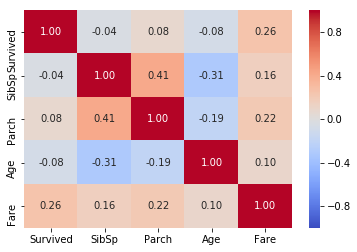

In [6]:
# Correlation matrix between numerical values and Survived.
# Pclass is Categorical, and Passenger ID is just a form of indexing.
g = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm", vmin=-1, vmax=1)

The only numerical value that seems to have a significant correlation to Survived is Fare.

Now to explore the remaining features further.

SibSP

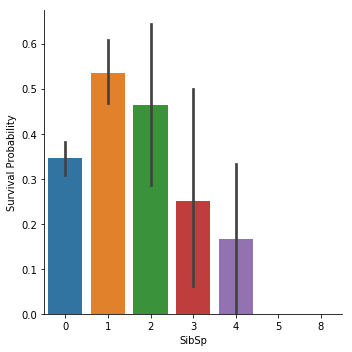

In [7]:
# Exploring SibSp feature vs Survived
ax = sns.factorplot(data=train, x='SibSp', y='Survived', kind='bar', size=5)
ax = ax.set_ylabels('Survival Probability')

It seems that passengers with many siblings/spouses have a lower chance to survive.

Parch

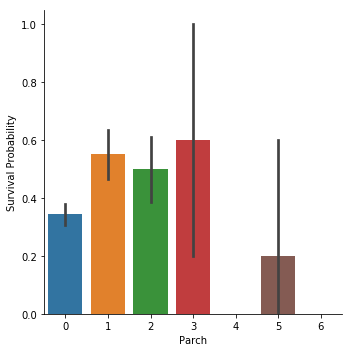

In [8]:
# Exploring Parch feature vs Survived
ax = sns.factorplot(data=train, x='Parch', y='Survived', kind='bar', size=5)
ax = ax.set_ylabels('Survival Probability')

It seems like small families have a higher chance to survive. The standard deviation on Parch 3 is very large.

Age

D:\Balmeet\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Balmeet\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


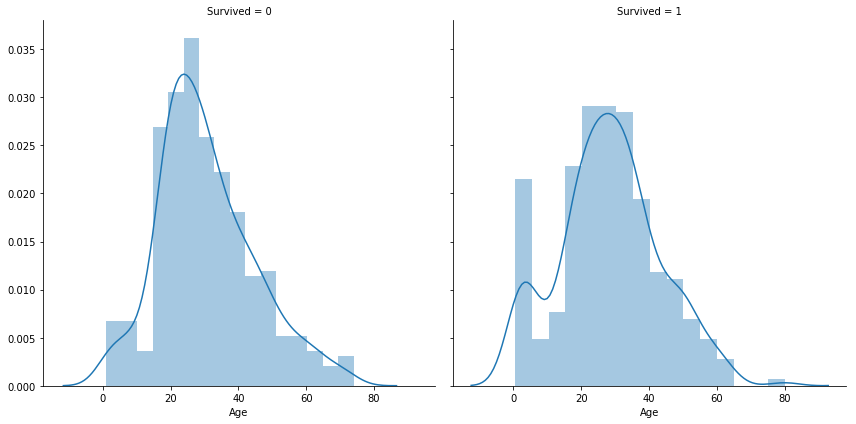

In [9]:
# Exploring Age feature vs Survived
ax = sns.FacetGrid(data=train, col='Survived', size=6)
ax = ax.map(sns.distplot, "Age")

The distribution for Age seems to be right skewed for those that did not survive, and might be gaussian for those that did survive with a spike for younger ages. 

Elder passengers seem to have a lower chance to survive.

Even if there isn't a strong correlation between Age and Survival, there are certain age categories that seem to have a higher or lower chance of survival.

Lets explore this further by superimposing them together.

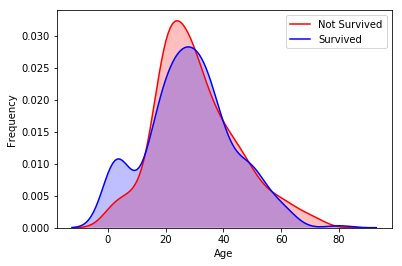

In [10]:
ax = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], color="Red", shade = True)
ax = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax=ax, color="Blue", shade= True)

ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax = ax.legend(["Not Survived","Survived"])

By superimposing the two plots we can confirm there that is a spike at very young ages correlating to a higher survival.

Fare

In [11]:
train['Fare'].isnull().sum()
test['Fare'].isnull().sum()

1

In [12]:
# Fill the missing Fare value in the test dataset with the mean of the test dataset.
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

D:\Balmeet\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Balmeet\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


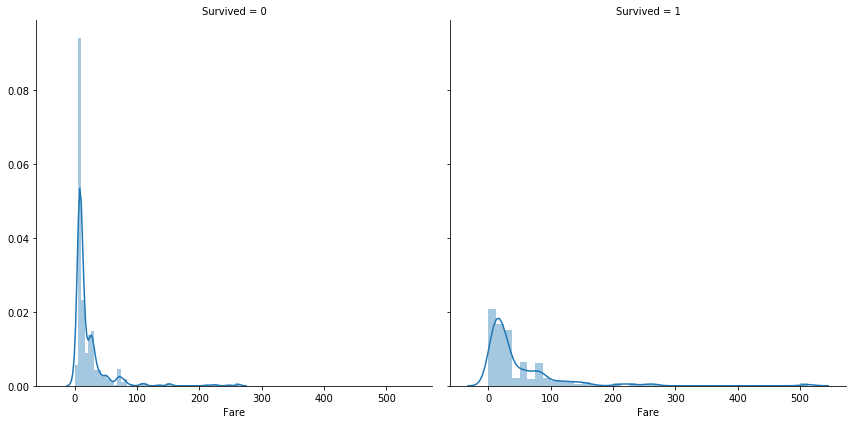

In [13]:
# Exploring Fare feature vs Survived
ax = sns.FacetGrid(data=train, col='Survived', size=6)
ax = ax.map(sns.distplot, "Fare")

In [14]:
print(train['Fare'].skew())
print(train['Fare'].groupby(train['Survived']).skew())

4.787316519674893
Survived
0    4.553140
1    3.862779
Name: Fare, dtype: float64


Due to the heavy skew(skewness is greater than 1) this data needs to be transformed. We will use a log transformation to lessen the skewness

D:\Balmeet\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Balmeet\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


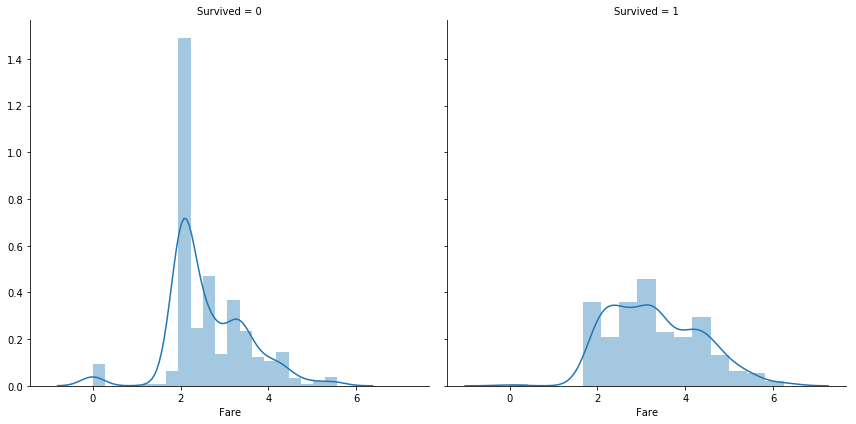

In [15]:
train['Fare'] = train['Fare'].apply(lambda n: np.log(n) if n>0 else 0)
test['Fare'] = test['Fare'].apply(lambda n: np.log(n) if n>0 else 0)
ax = sns.FacetGrid(data=train, col='Survived', size=6)
ax = ax.map(sns.distplot, "Fare")

In [16]:
print(train['Fare'].skew())
print(train['Fare'].groupby(train['Survived']).skew())

0.44310881405404506
Survived
0    0.332467
1    0.412114
Name: Fare, dtype: float64


The skewness is definitely reduced, and the skew should not cause as much of a weighting issue for the model as before.

#### Categorical Values

Sex

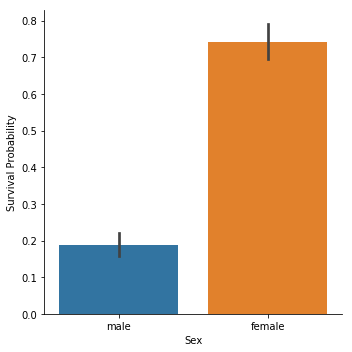

In [17]:
ax = sns.factorplot(data=train, x='Sex',y='Survived', kind='bar', size=5)
ax = ax.set_ylabels('Survival Probability')

This plot shows a heavy correlation to being female and survival.

Pclass

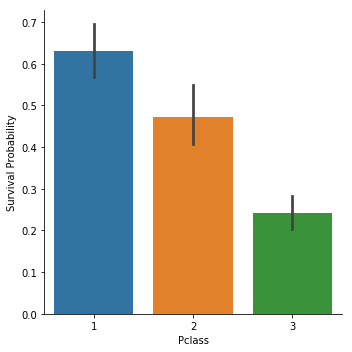

In [18]:
ax = sns.factorplot(data=train, x='Pclass',y='Survived', kind='bar', size=5)
ax = ax.set_ylabels('Survival Probability')

It seems as though Pclass does give a difference in survival. Let us also separate by Sex to make sure that Sex isn't the cause of this difference.

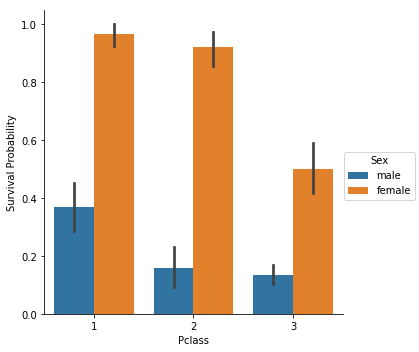

In [19]:
ax = sns.factorplot(data=train, x='Pclass',y='Survived', hue='Sex', kind='bar', size=5)
ax = ax.set_ylabels('Survival Probability')

This extra layer of separation shows that Pclass has a different effect based on the Sex of the passenger.

But overall the higher the passenger class, the better chance of survival.

Embarked

In [20]:
print(train['Embarked'].isnull().sum())
print(test['Embarked'].isnull().sum())

2
0


In [21]:
train['Embarked'].value_counts()
train['Embarked'] = train['Embarked'].fillna('S')
print(train['Embarked'].isnull().sum())

0


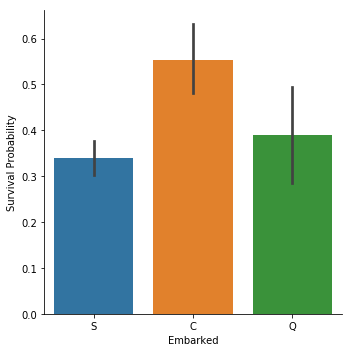

In [22]:
ax = sns.factorplot(data=train, x='Embarked',y='Survived', kind='bar', size=5)
ax = ax.set_ylabels('Survival Probability')

There is definitely a difference in Survival rate based on the Embarked value. Let us see if there were any other factors that are causing this difference.

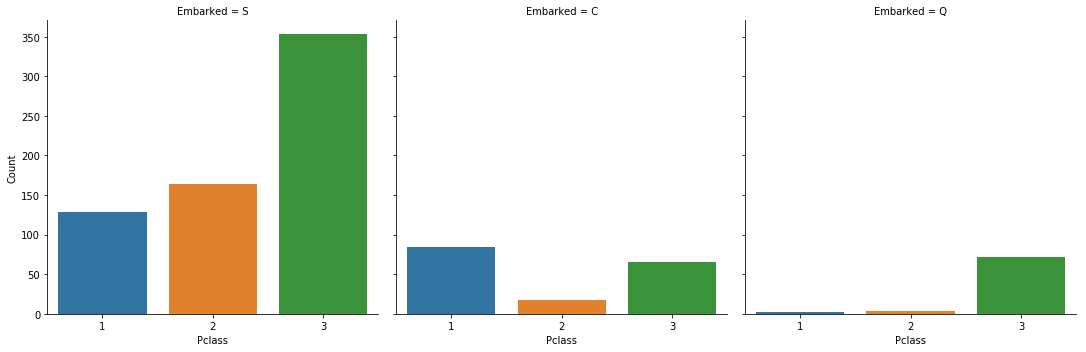

In [23]:
ax = sns.factorplot(data=train, x='Pclass', col='Embarked', kind='count', size=5)
ax = ax.set_ylabels('Count')

It seems as though the passengers from Q and S were 3rd Pclass passengengers. Those embarking from C were most likely to be 1st Pclass passengers, who also happen to have the higher survival rate compared to the other Pclasses.

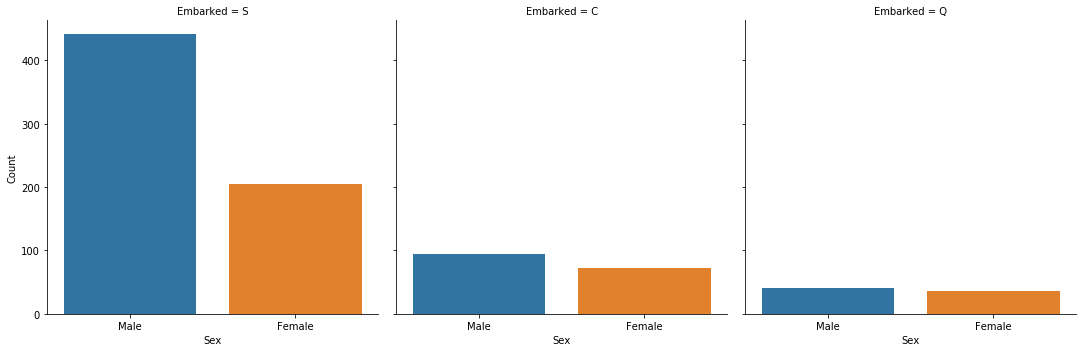

In [24]:
ax = sns.factorplot(data=train, x='Sex', col='Embarked', kind='count', size=5)
ax = ax.set_ylabels('Count')
ax = ax.set_xticklabels(labels=['Male','Female'])

Most of those embarking from every location were male, but a large majority of those that embarked from S were male.

### Filling Missing Values

Age

In [25]:
print(train['Age'].isnull().sum())
print(test['Age'].isnull().sum())

177
86


Age is most likely an important column to use due to some subpopulations having a higher percentage of survival. Also, the test data has some missing age values, so we have to fill in those values.

Overall, the Age columns in train and test have 256 missing values.

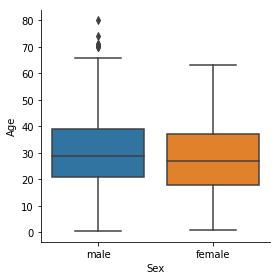

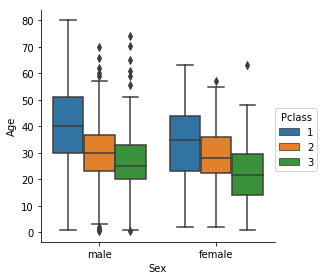

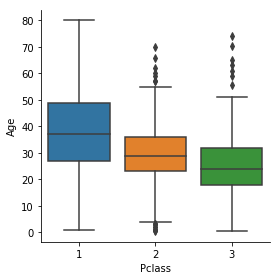

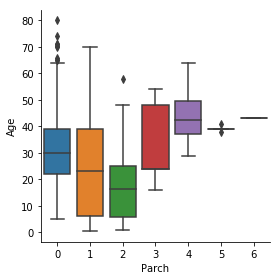

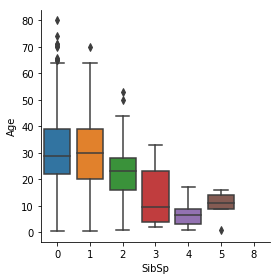

In [26]:
# Explore Age vs other columns
ax = sns.factorplot(y='Age', x='Sex', data=train,kind='box')
ax = sns.factorplot(y='Age', x='Sex', hue='Pclass' ,data=train,kind='box')
ax = sns.factorplot(y='Age', x='Pclass', data=train,kind='box')
ax = sns.factorplot(y='Age', x='Parch', data=train,kind='box')
ax = sns.factorplot(y='Age', x='SibSp', data=train,kind='box')

The Age distributions for male and female are similar enough, so Sex isn't a good indicator for Age.

When Sex is separated by Pclass, the distributions are similar, but Pclass seems to have some correlation to Age. Pclass 1 has a higher average age than Pclass 2, which has a higher average age than Pclass 3.

The more parents/children(Parch) a person had, the older they were. The more siblings/spouses(SibSp) a person had the younger they were.

Given this information, we can double check with a correlation matrix, but we need to have Sex be a part of it, so we will change it to a categorical variable.

In [27]:
train['Sex'] = train['Sex'].replace(['male','female'],[0,1])
test['Sex'] = test['Sex'].replace(['male','female'],[0,1])

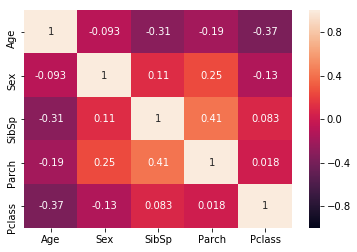

In [28]:
ax = sns.heatmap(train[['Age', 'Sex', 'SibSp', 'Parch', 'Pclass']].corr(), annot=True, vmax=1, vmin=-1)

The matrix gives us similar trends to what we saw in the boxplots. This can give us a better strategy to fill in the null values for Age.

Using Parch, SibSp, and Pclass we will find the median age and fill it in for each missing value.

In [30]:
# Fill missing Age value

def age_na_fill(df):
    age_na_index = [age for age in df[df['Age'].isnull()].index]
    
    for i in age_na_index:
        age_med = df['Age'].median()
        age_pred = df[(df['SibSp'] == df.iloc[i]['SibSp']) & 
                      (df['Parch'] == df.iloc[i]['Parch']) & 
                      (df['Pclass'] == df.iloc[i]['Pclass'])]['Age'].median()
        if not np.isnan(age_pred):
            df['Age'].iloc[i] = age_pred
        else:
            df['Age'].iloc[i] = age_med
    return df
    
train = age_na_fill(train)
test = age_na_fill(test)
print(train['Age'].isnull().sum())
print(test['Age'].isnull().sum())

0
0


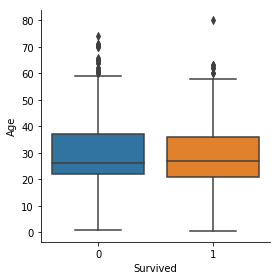

In [49]:
# Explore Age vs other columns
ax = sns.factorplot(y='Age', x='Survived', data=train,kind='box')

D:\Balmeet\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Balmeet\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


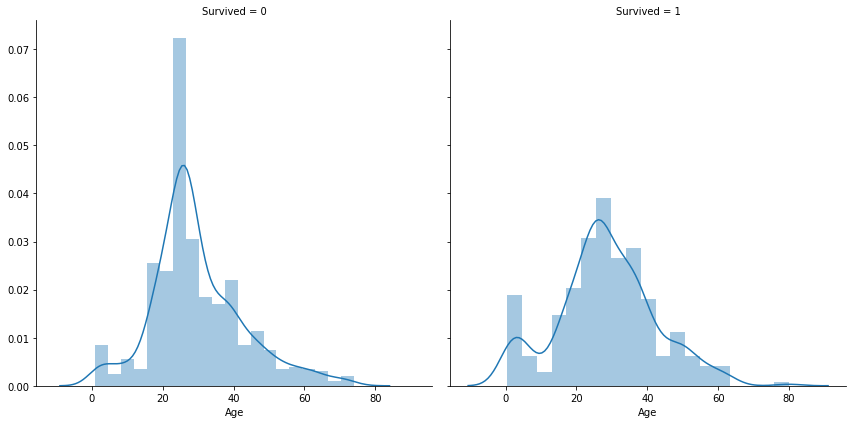

In [55]:
ax = sns.FacetGrid(data=train, col='Survived', size=6)
ax = ax.map(sns.distplot, "Age")

There is still a bump in the lower ages that correlates to survival.

The peak in the not survived subpopulation has increased compared to the last time we checked this distribution.